In [23]:
pypi_name = "pyomo"

# PyPI downloads

This Jupyter notebook fetches download statistics from PyPI, which is used to distribute the software, and plots them. The PyPI site knows about "mirrors", which represent duplicate copies of the software but not real downloads, so we can exclude them from the counts.

*Note: The statistics maintained by PyPI go back 180 days, so this script would need to be run periodically to track more than ~6 months of time.*


In [15]:
import numpy as np
import pandas as pd
import pypistats

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Fetch statistics from PyPI
Next, we fetch the data from PyPI using the `pypistats` package. This returns a Pandas dataframe that we can manipulate to extract only the downloads without mirrors, sorting by date, and calculating the cumulative number.

In [16]:
data = (
    pypistats.overall(pypi_name, total=True, format="pandas")
    [lambda d: d["category"].isin(["without_mirrors"])]
    .sort_values("date")
    .assign(
        cumulative_downloads=lambda d: d["downloads"].cumsum()
    )
)
data

,category,date,percent,downloads,cumulative_downloads
192,without_mirrors,2022-01-13,0.10%,1,1
164,without_mirrors,2022-01-15,0.19%,2,3
165,without_mirrors,2022-01-17,0.19%,2,5
124,without_mirrors,2022-01-21,0.29%,3,8
193,without_mirrors,2022-01-22,0.10%,1,9
...,...,...,...,...,...
186,without_mirrors,2022-07-06,0.19%,2,175
70,without_mirrors,2022-07-08,0.48%,5,180
187,without_mirrors,2022-07-09,0.19%,2,182
130,without_mirrors,2022-07-11,0.29%,3,185


## Generate plot
Now we plot the data, saving the plot as a file and displaying it below.

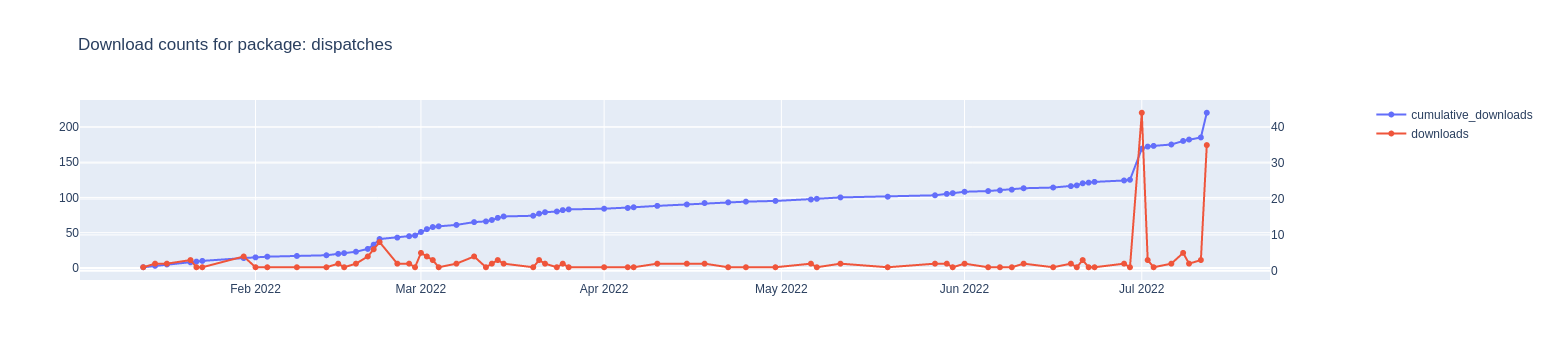

In [20]:
def _make_multi_axes(
        df,
        x: str,
        y: str,
        y_secondary: str,
    ):
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    x_data = df[x]
    
    return (
        fig
        .add_trace(
            go.Scatter(
                x=x_data,
                y=df[y],
                mode="lines+markers",
                name=y,
            ),
            secondary_y=False,
        )
        .add_trace(
            go.Scatter(
                x=x_data,
                y=df[y_secondary],
                mode="lines+markers",
                name=y_secondary,
            ),
            secondary_y=True,
        )
    )

(
    data
    .pipe(
        _make_multi_axes,
        x="date",
        y="cumulative_downloads",
        y_secondary="downloads"
    )
    .update_layout(
        title=f"Download counts for package: {pypi_name}"
    )
)

In [22]:
with pd.option_context('display.max_rows', None):
    display(
        data
        .set_index("date")
        .sort_index()
    )

,category,percent,downloads,cumulative_downloads
date,,,,
2022-01-13,without_mirrors,0.10%,1,1
2022-01-15,without_mirrors,0.19%,2,3
2022-01-17,without_mirrors,0.19%,2,5
2022-01-21,without_mirrors,0.29%,3,8
2022-01-22,without_mirrors,0.10%,1,9
2022-01-23,without_mirrors,0.10%,1,10
2022-01-30,without_mirrors,0.39%,4,14
2022-02-01,without_mirrors,0.10%,1,15
2022-02-03,without_mirrors,0.10%,1,16
